In [1]:
import qiskit as q
from matplotlib import style
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_bloch_multivector, plot_histogram
style.use("dark_background")

In [2]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
provider = IBMQ.get_provider("ibm-q")

In [4]:
backend = provider.get_backend("ibmq_qasm_simulator")
sv_backend = q.Aer.get_backend("statevector_simulator")

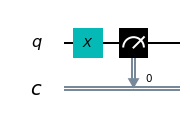

In [5]:
circuit = q.QuantumCircuit(1,1)
circuit.x(0)
circuit.measure([0],[0])
circuit.draw(output="mpl")

In [7]:
job = q.execute(circuit, backend=backend, shots=1024)
job_monitor(job)
result = job.result()

Job Status: job has successfully run


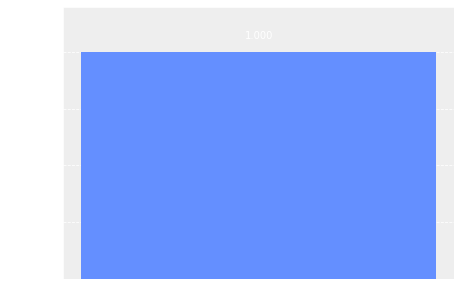

In [8]:
plot_histogram([result.get_counts(circuit)])

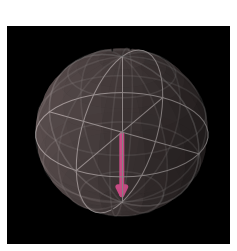

In [9]:
sv_job = q.execute(circuit, backend=sv_backend, shots=1024)
statevector = sv_job.result().get_statevector()
plot_bloch_multivector(statevector)